In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('synthetic_hospital_readmissions_data.csv')
data.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,Female,Urgent,Diabetes,35,14,2,1,4,5,Normal,No
1,2,32,Other,Emergency,Infection,66,3,1,2,4,6,NaN,No
2,3,78,Female,Elective,Diabetes,22,2,4,3,3,5,Abnormal,Yes
3,4,38,Female,Urgent,Infection,22,10,2,2,3,9,Normal,Yes
4,5,41,Male,Emergency,Heart Disease,3,6,4,3,1,2,Abnormal,No


In [3]:
data.shape

(10000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


In [5]:
#Calculate missing values
data.isnull().sum()

Patient_ID                  0
Age                         0
Gender                      0
Admission_Type              0
Diagnosis                   0
Num_Lab_Procedures          0
Num_Medications             0
Num_Outpatient_Visits       0
Num_Inpatient_Visits        0
Num_Emergency_Visits        0
Num_Diagnoses               0
A1C_Result               4034
Readmitted                  0
dtype: int64

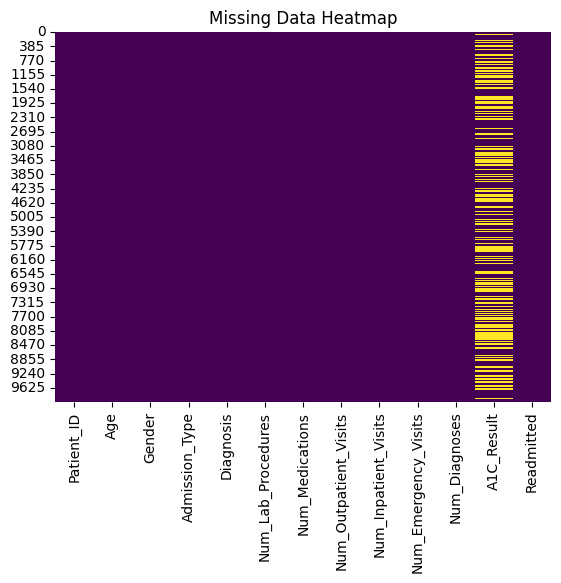

In [6]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [7]:
#Check duplicates
duplicates = data.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [8]:
# Numerical Features
# Summary statistics
data.describe()

,Patient_ID,Age,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,51.115100,49.744800,15.025000,2.002900,1.996800,2.001400,4.991400
std,2886.89568,19.552286,28.492038,8.391127,1.420033,1.411449,1.414142,2.591871
min,1.00000,18.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2500.75000,34.000000,25.000000,8.000000,1.000000,1.000000,1.000000,3.000000
50%,5000.50000,51.000000,50.000000,15.000000,2.000000,2.000000,2.000000,5.000000
75%,7500.25000,68.000000,74.000000,22.000000,3.000000,3.000000,3.000000,7.000000
max,10000.00000,150.000000,99.000000,35.000000,4.000000,4.000000,4.000000,9.000000


In [9]:
data.select_dtypes(include=['float64','int64']).columns

Index(['Patient_ID', 'Age', 'Num_Lab_Procedures', 'Num_Medications',
       'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits',
       'Num_Diagnoses'],
      dtype='object')

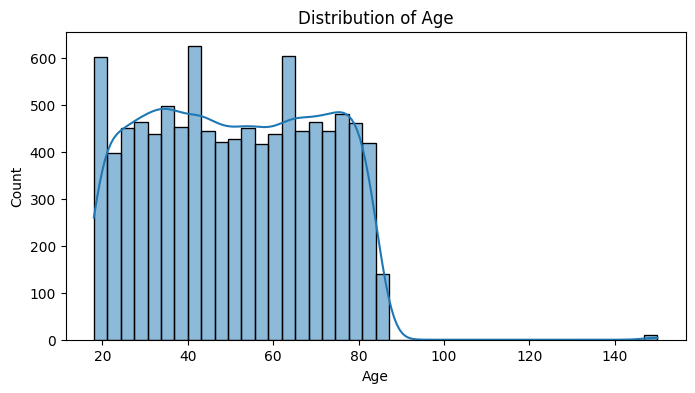

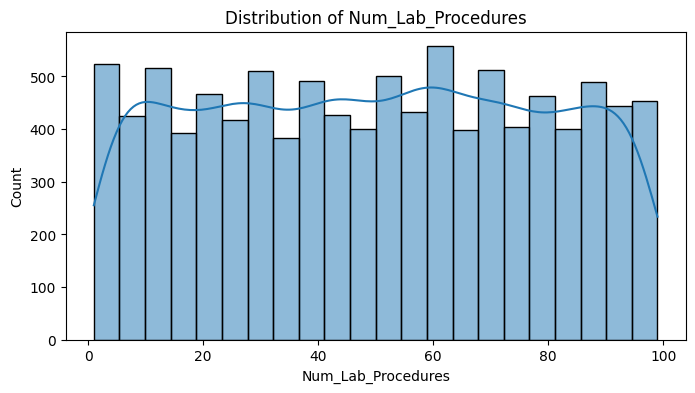

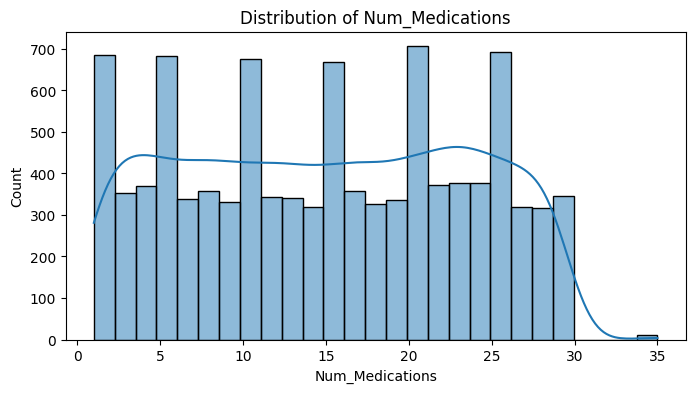

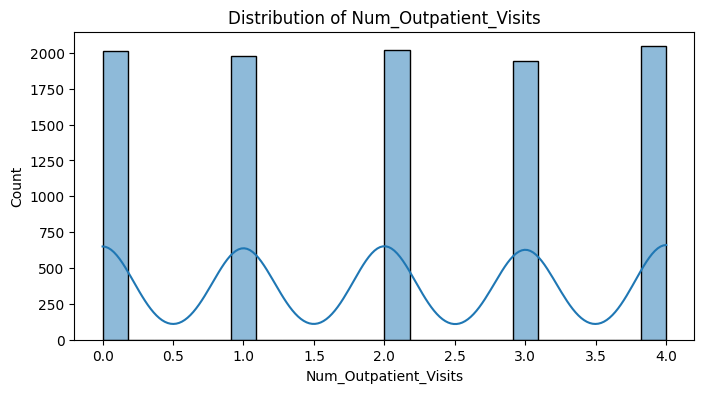

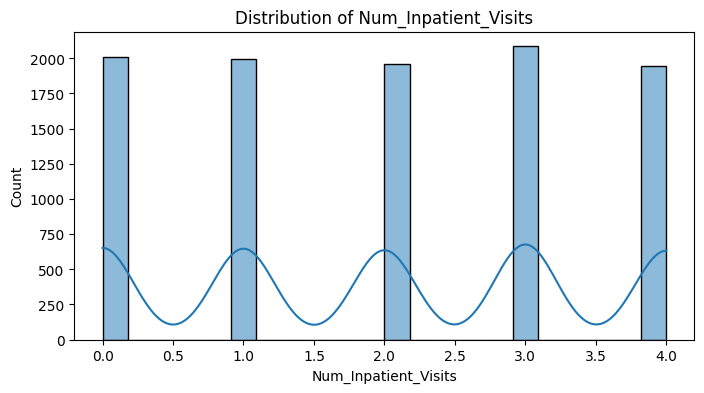

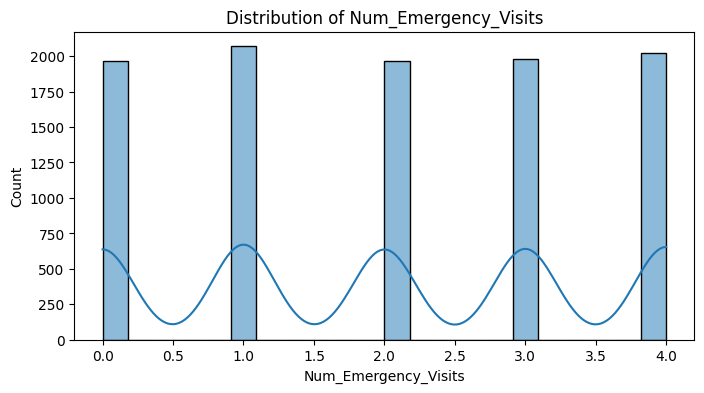

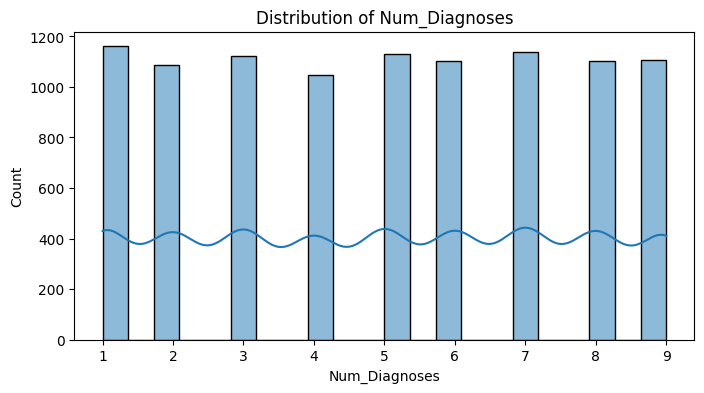

In [10]:
#Distribution of Numerical Features
numerical_columns = ['Age', 'Num_Lab_Procedures', 'Num_Medications',
       'Num_Outpatient_Visits', 'Num_Inpatient_Visits', 'Num_Emergency_Visits',
       'Num_Diagnoses']
for col in numerical_columns:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.savefig('qww.jpg')
    plt.show()

In [11]:
# Categorical Features
# Value counts
for col in data.select_dtypes(include=['object']).columns:
    print(data[col].value_counts())
    print("\n")

Gender
Female    3396
Other     3312
Male      3292
Name: count, dtype: int64


Admission_Type
Emergency    3399
Urgent       3339
Elective     3262
Name: count, dtype: int64


Diagnosis
Infection        2573
Diabetes         2520
Heart Disease    2476
Injury           2431
Name: count, dtype: int64


A1C_Result
Normal      3004
Abnormal    2962
Name: count, dtype: int64


Readmitted
No     5054
Yes    4946
Name: count, dtype: int64




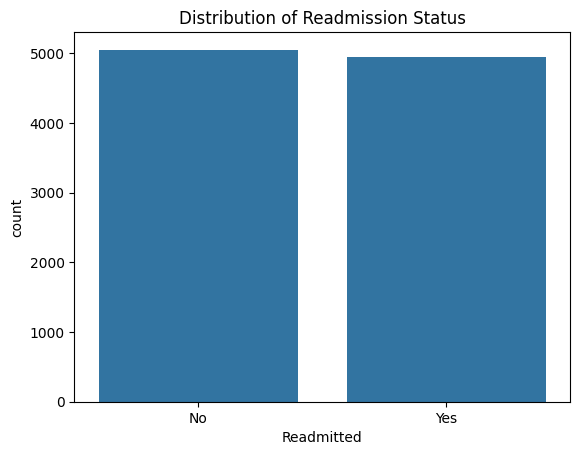

In [12]:
 # Target Variable Analysis
sns.countplot(x=data['Readmitted'])
plt.title("Distribution of Readmission Status")
plt.show()

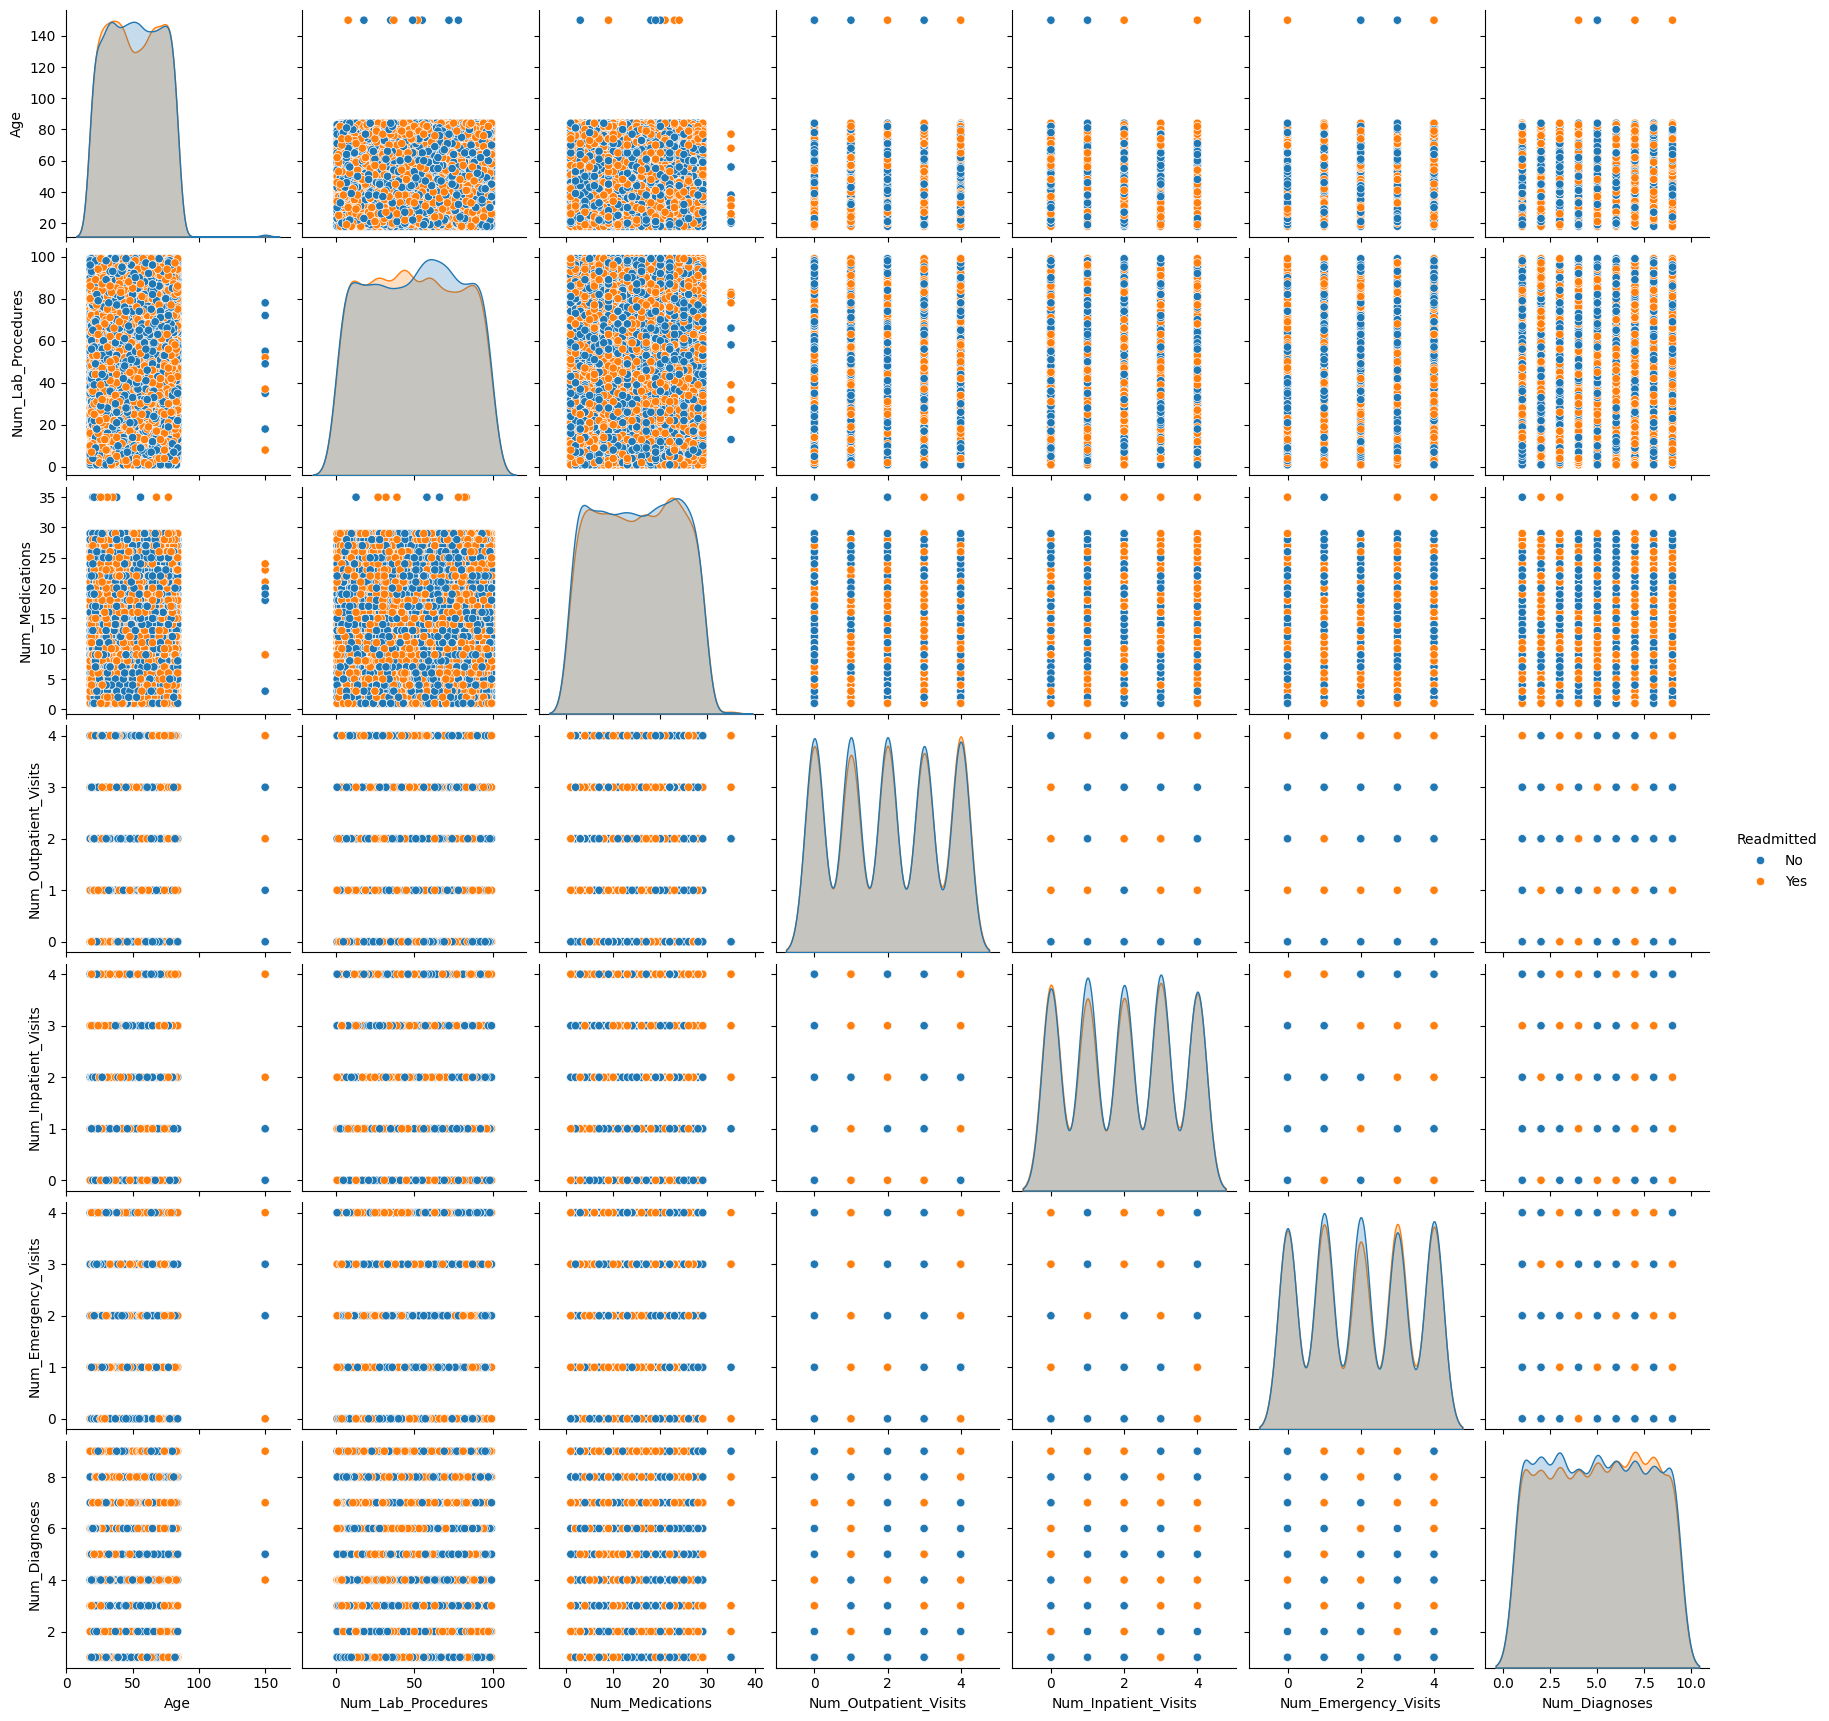

In [13]:
# Feature Relationships
important_features =[ 'Age', 'Gender', 'Admission_Type', 'Diagnosis',
       'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits',
       'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses',
       'A1C_Result']  
sns.pairplot(data[important_features + ['Readmitted']], hue='Readmitted')
plt.show()


In [14]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Admission_Type', 'Diagnosis',
       'Num_Lab_Procedures', 'Num_Medications', 'Num_Outpatient_Visits',
       'Num_Inpatient_Visits', 'Num_Emergency_Visits', 'Num_Diagnoses',
       'A1C_Result', 'Readmitted'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


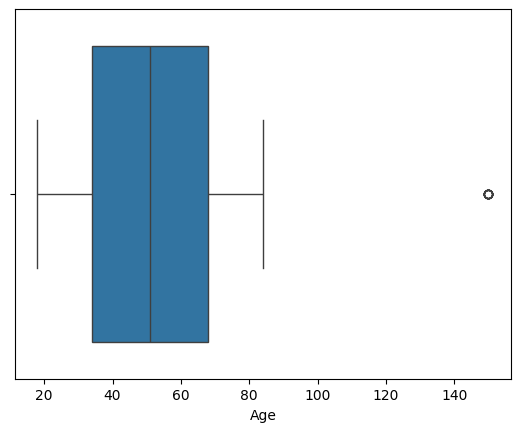

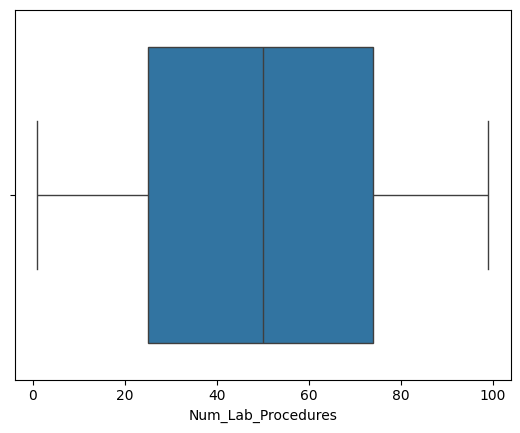

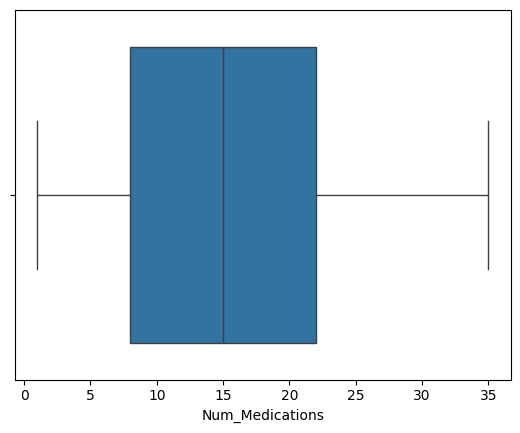

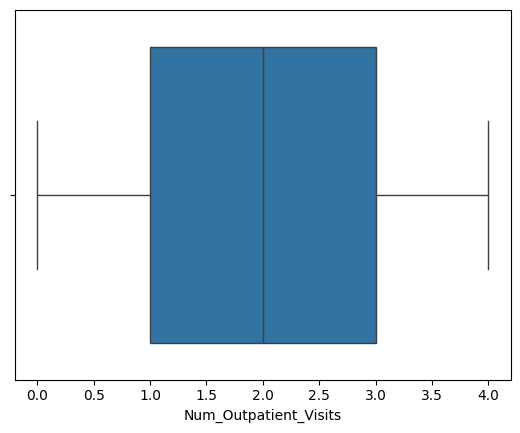

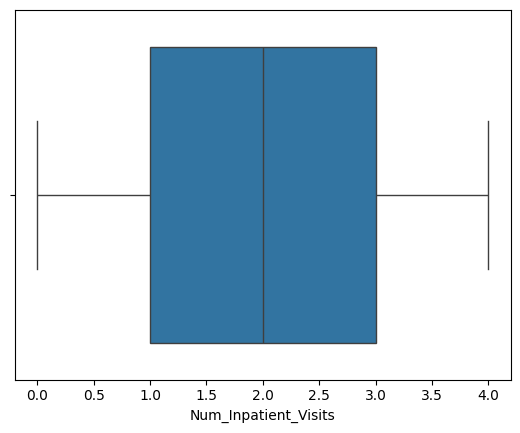

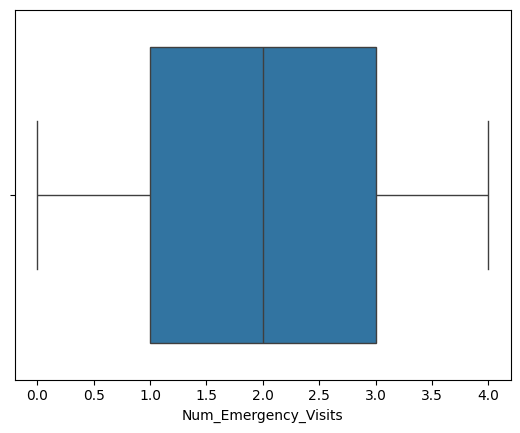

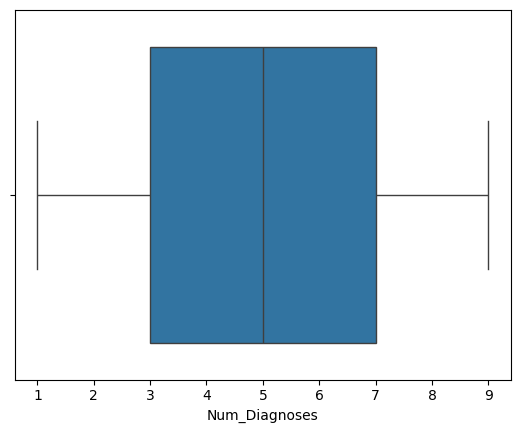

In [16]:
# Univariate Analysis
for i in numerical_columns:
    sns.boxplot(x=data[i])
    plt.savefig('asd.jpg')
    plt.show()

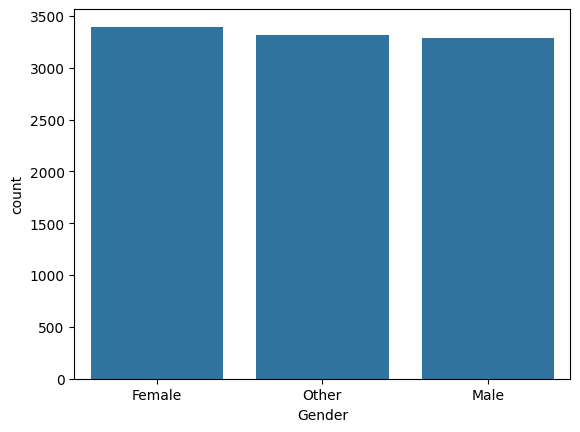

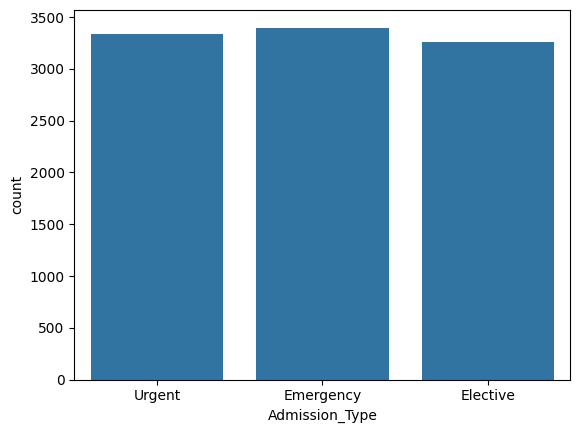

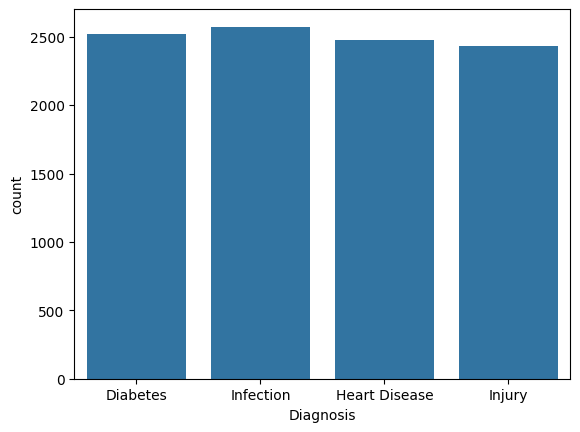

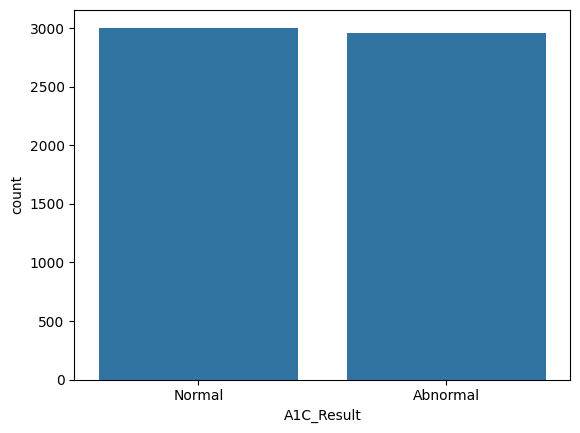

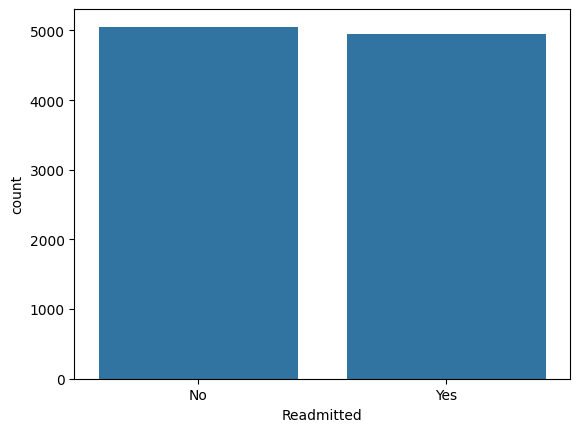

In [17]:
for i in data.select_dtypes(include=['object']).columns:
    sns.countplot(x=data[i])
    plt.show()

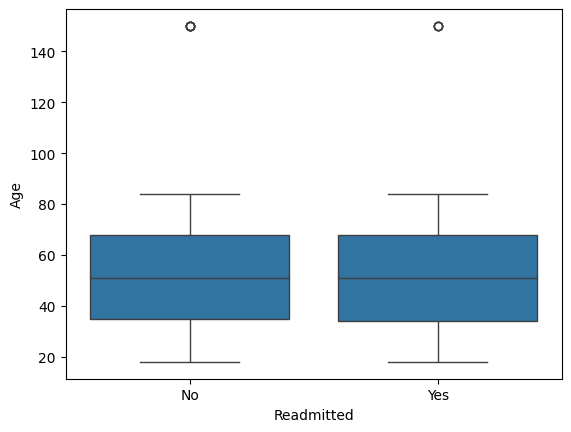

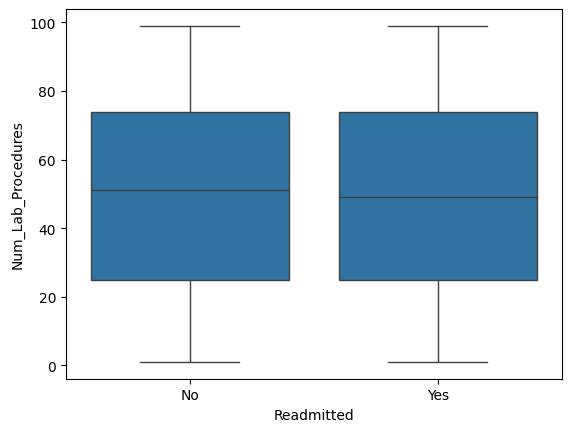

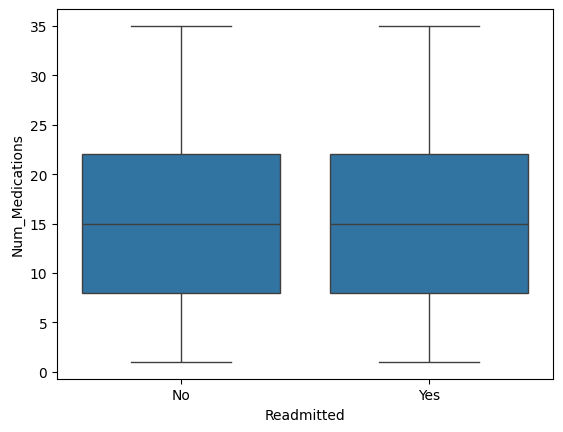

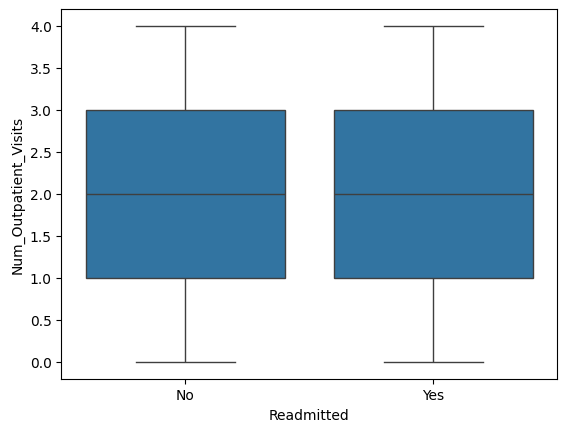

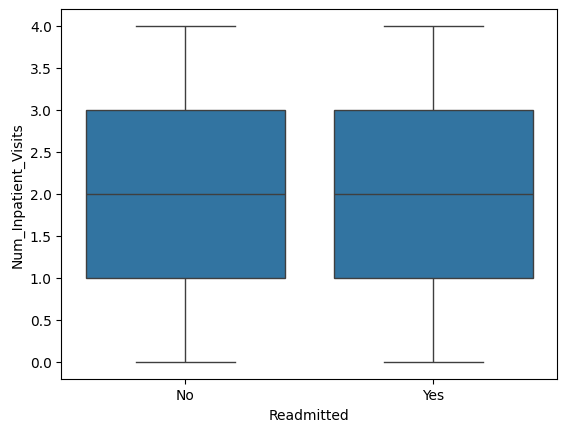

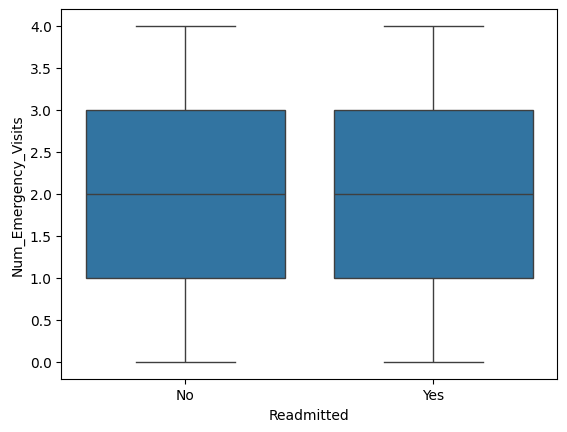

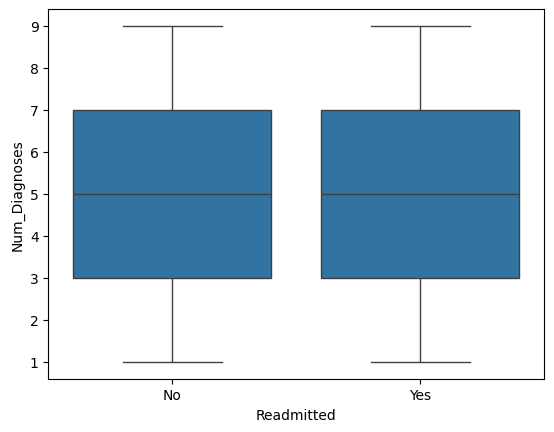

In [18]:
# Bivariate Analysis
for i  in numerical_columns:
    sns.boxplot(x='Readmitted',y=i,data=data)
    plt.show()

In [19]:
data['Diagnosis'].unique()

array(['Diabetes', 'Infection', 'Heart Disease', 'Injury'], dtype=object)

In [20]:
for i in data.select_dtypes(include='object').columns:
    print(data.groupby([i,'Readmitted'])['Patient_ID'].count())
    print('\n')

Gender  Readmitted
Female  No            1696
        Yes           1700
Male    No            1674
        Yes           1618
Other   No            1684
        Yes           1628
Name: Patient_ID, dtype: int64


Admission_Type  Readmitted
Elective        No            1633
                Yes           1629
Emergency       No            1699
                Yes           1700
Urgent          No            1722
                Yes           1617
Name: Patient_ID, dtype: int64


Diagnosis      Readmitted
Diabetes       No            1276
               Yes           1244
Heart Disease  No            1285
               Yes           1191
Infection      No            1295
               Yes           1278
Injury         No            1198
               Yes           1233
Name: Patient_ID, dtype: int64


A1C_Result  Readmitted
Abnormal    No            1457
            Yes           1505
Normal      No            1536
            Yes           1468
Name: Patient_ID, dtype: int64


Readm

In [21]:
data['Readmitted'].value_counts()

Readmitted
No     5054
Yes    4946
Name: count, dtype: int64

In [ ]:
sns.countplot(x='Readmitted',data=data)
plt.title('Distribution of Readmission')
plt.show()

In [ ]:
plt.pie(data['Readmitted'].value_counts(),labels=data['Readmitted'].unique(),autopct='%.0f%%')
plt.show()

In [ ]:
#Distribution of Numerical Features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
#Use boxplots to detect outliers:
for col in numerical_columns:
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [ ]:
# Correlation Analysis
correlation = data[numerical_columns].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Summarize categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n", data[col].value_counts())

In [ ]:
#Analyze the relationship between categorical variables and the target
for col in categorical_columns:
    default_rate = data.groupby(col)['Readmitted'].count()
    print(f"\nDefault Rate by {col}:\n", default_rate)

    # Visualize
    default_rate.plot(kind='bar')
    plt.title(f'Readmission Rate by {col}')
    plt.ylabel('Readdmission Rate')
    plt.show()

In [ ]:
# Numerical Features vs. Target

for col in numerical_columns:
    sns.boxplot(x='Readmitted', y=col, data=data)
    plt.title(f'{col} vs Readmission')
    plt.show()

In [ ]:
sns.pairplot(data, hue='Readmitted', vars=numerical_columns)
plt.show()

In [ ]:
#Categorical Features vs. Target
for col in categorical_columns:
    crosstab = pd.crosstab(data[col], data['Readmitted'], normalize='index')
    crosstab.plot(kind='bar', stacked=True)
    plt.title(f'{col} vs Readmission')
    plt.ylabel('Proportion')
    plt.show()

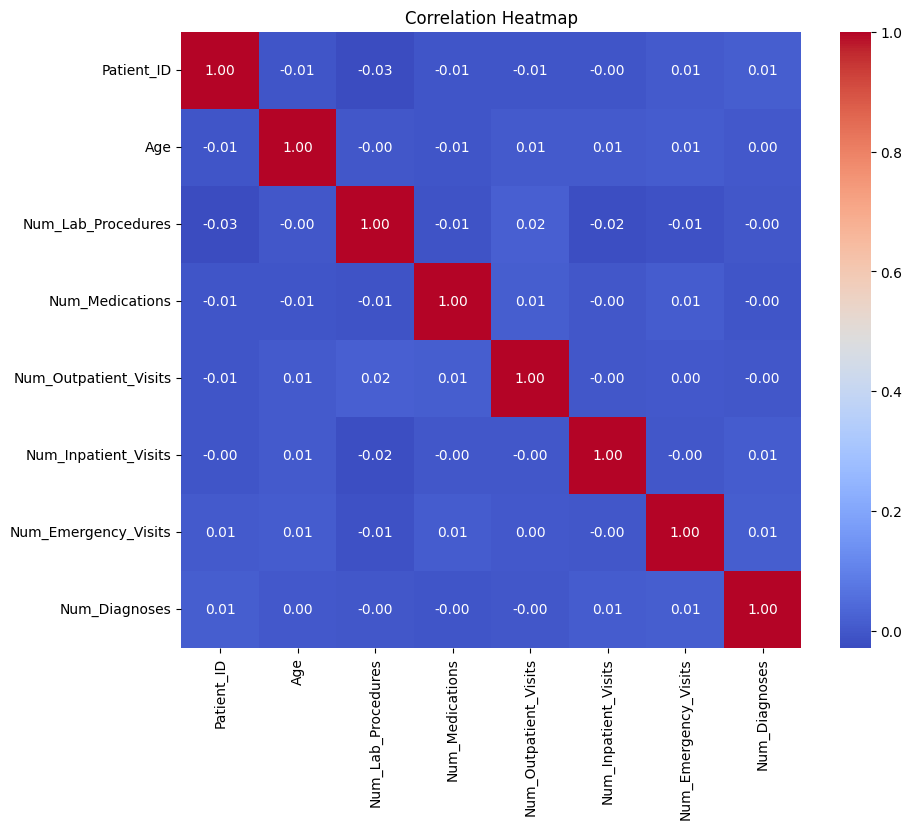

In [19]:
# Compute the correlation matrix
corr_matrix = data.select_dtypes(include=['float64','int64']).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
